In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from numpy_only_dnn import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))


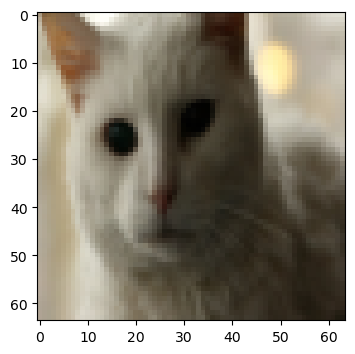

y = 1. It's a cat picture.


In [4]:
# Example of a picture
index = 124
plt.imshow(train_x_orig[index])
plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
total = 0
for index in range(209):
    total += train_y[0,index]
print(total)

72


In [6]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [9]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
    
        cost = compute_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations and for the last iteration
        if print_cost and (i % 100 == 0 or i == num_iterations - 1):
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    
    return parameters, costs

In [22]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = .0075, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.8116017481136115
Cost after iteration 100: 0.6676695646220319
Cost after iteration 200: 0.6339824668918083
Cost after iteration 300: 0.6057467650054879
Cost after iteration 400: 0.5629711332996641
Cost after iteration 500: 0.41594126531630166
Cost after iteration 600: 0.3204714324288974
Cost after iteration 700: 0.23247347952907185
Cost after iteration 800: 0.14847577500848305
Cost after iteration 900: 0.08750257977951197
Cost after iteration 1000: 0.05738770594106682
Cost after iteration 1100: 0.039936524912202016
Cost after iteration 1200: 0.030270549594624663
Cost after iteration 1300: 0.024070231198004163
Cost after iteration 1400: 0.0196565560593552
Cost after iteration 1500: 0.01649169853630517
Cost after iteration 1600: 0.014169402307804965
Cost after iteration 1700: 0.012192418435785628
Cost after iteration 1800: 0.010697445643829276
Cost after iteration 1900: 0.009464245952082267
Cost after iteration 2000: 0.00848784945499099
Cost after iteration 2100

In [23]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [24]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8
